In [1]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [3]:
# Define the list of age buckets that the age detector will predict
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)", "(38-43)", "(48-53)", "(60-100)"]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
face_path = '/content/drive/MyDrive/opencv-age-detection/face_detector'
age_model_path= '/content/drive/MyDrive/opencv-age-detection/age_detector'
image_test= '/content/drive/MyDrive/opencv-age-detection/images/neil_patrick_harris.png'
confidence_set= 0.5


In [5]:
# Load the serialized face detector model from disk
print("[INFO] Loading face detector model...")
prototxtPath = os.path.sep.join([face_path, "deploy.prototxt"])
weightsPath = os.path.sep.join([face_path, "res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] Loading face detector model...


In [6]:
# Load the serialized age detector model from disk
print("[INFO] Loading age detector model...")
prototxtPath = os.path.sep.join([age_model_path, "age_deploy.prototxt"])
weightsPath = os.path.sep.join([age_model_path, "age_net.caffemodel"])
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] Loading age detector model...


In [7]:
# Load the input image and construct a blob for the input image
image = cv2.imread(image_test)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

In [8]:
# Pass the blob through the network and obtain the face detections
print("[INFO] Computing the face detections...")
faceNet.setInput(blob)
detections = faceNet.forward()

[INFO] Computing the face detections...


In [9]:
# Loop over the detections
for i in range(0, detections.shape[2]):
    # Extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    if confidence > confidence_set:
        # Compute the (x, y) - coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # Extract the ROI for the face detection and construct a blob from *only* the face ROI
        face = image[startY:endY, startX:endX]
        faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746),
                                         swapRB=False)
        # Make predictions on the age and find the age bucket with the largest corresponding probability
        ageNet.setInput(faceBlob)
        preds = ageNet.forward()
        i = preds[0].argmax()
        age = AGE_BUCKETS[i]
        ageConfidence = preds[0][i]
        # Display the predicted age to the terminal
        text = "{}: {:.2f}%".format(age, ageConfidence * 100)
        print("[INFO] {}".format(text))
        # Draw the bounding box of the face along with the associated predicted age
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

[INFO] (8-12): 85.72%


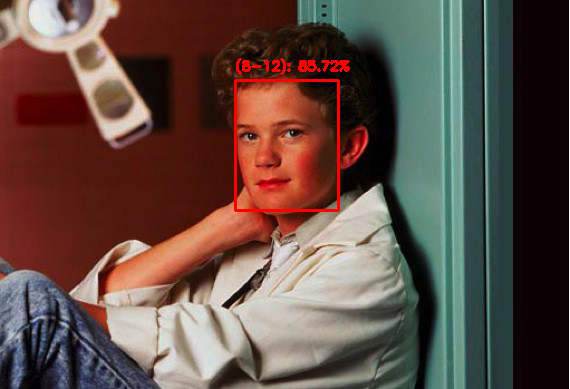

In [10]:
# Display the output image
cv2_imshow(image)

## Desafio: Realizar a avaliação do Modelo de Classificação disponibilizado nas etapas a seguir:

## Requisitos do Modelo
O modelo deve determinar a idade de uma pessoa em uma das seguintes categorias: 

 "(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)", "(38-43)", "(48-53)", "(60-100)"

Dada a imagem de uma pessoa, inicialmente a regiao da face é determinada, e em seguida o modelo de age detector realiza a predição com um determinado grau de confiança.  

# Etapa 1: 

Estabeleça os cenários de teste possíveis e construa um dataset de teste com uma quantidade mínima de imagens de cada classe: 

 "(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)", "(38-43)", "(48-53)", "(60-100)"



# Etapa 2:

Execute o dataset de teste e obtenha as métricas de avaliação do modelo que você considera importante, explicando o porque tais métricas foram utilizadas.

# Etapa 3:

Explique o resultado da execução e sua conclusão com base nas métricas obtidas. 



# Etapa 4: 

Podem ser feitas melhorias no modelo testado? Caso sim, explique quais?